In [102]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
import statistics as stats
import re

from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_multilabel_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [104]:
songs = pd.read_excel('/content/song_lyrics_labeled (1).xlsx')
songs.dropna(inplace=True)
songs

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,year,singer,names,categories,lyrics,hope,money,...,friend,equal,swear,nature,regret,memory,sf,food,confi,enjoy
0,0,0,0,1964,금호동,내일또만납시다,희망,하루의 일을 끝내고 돌아가는거리엔 사람의 물결하늘엔 별이 하나 둘 반짝이면가로등 하...,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1964,최숙자,눈물의연평도,"후회, 자연",조기를 담뿍잡아기폭을 올리고온다던 그배는어이하여 아니오나수평선 바라보며그이름 부르면...,0,0,...,0,0,0,1,1,0,0,0,0,0
2,2,2,2,1964,이미자,님이라부르리까,사랑,<1절 임이라 부르리까 당신이라고 부르리까 사랑을 하면서도 사랑을 참고사는 마음으로...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,3,1964,이미자,동백아가씨,"사랑, 후회",헤일 수 없이 수많은 밤을내 가슴 도려내는 아픔에 겨워얼마나 울었던가 동백아가씨그리...,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,4,4,1964,현미,떠날때는말없이,"사랑, 후회",그 날 밤 그 자리에둘이서 만났을 때똑같은 그 순간에똑같은 마음이달빛에 젖은 채밤새...,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,6195,6195,7432,2021,IVE(아이브),ELEVEN,사랑,따분한 나의 눈빛이 무표정했던 얼굴이 널 보며 빛나고 있어 널 담은 눈동자는 내 ...,0,0,...,0,0,0,0,0,0,0,0,0,0
6196,6196,6196,7433,2021,다비치,매일크리스마스(EverydayChristmas),사랑,모두가 기다려온 이 겨울 두 손엔 가득 선물을 행복한 사람들 빛...,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,6197,6197,7434,2021,아이유(IU),겨울잠,희망,때 이른 봄 몇 송이 꺾어다 너의 방 문 앞에 두었어 긴 잠 실컷 자고 나오면 그때...,1,0,...,0,0,0,0,0,0,0,0,0,0
6198,6198,6198,7435,2021,폴킴(PaulKim),찬란한계절,사랑,비가 내리는 반대편으로 여름을 향해 달리네 내게로 내미는 어떤 것도 끝내 붙잡지 못...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
songs.iloc[0]

Unnamed: 0                                                        0
Unnamed: 0.1                                                      0
Unnamed: 0.1.1                                                    0
year                                                           1964
singer                                                          금호동
names                                                       내일또만납시다
categories                                                       희망
lyrics            하루의 일을 끝내고 돌아가는거리엔 사람의 물결하늘엔 별이 하나 둘 반짝이면가로등 하...
hope                                                              1
money                                                             0
love                                                              0
filial                                                            0
friend                                                            0
equal                                                             0
swear                                           

In [106]:
# def combine_df(df):
#   full = []
#   for i in tqdm(range(df.shape[0])):
#     sem = []
#     for j in range(8,22):
#       sem.append(songs.iloc[i][j])
#     full.append(sem)
#   return full

In [107]:
# full = combine_df(songs)
# songs['full'] = full

In [108]:
def get_number(df):
  sum = 0
  for i in range(df.shape[0]):
    sum += df.iloc[i]
  return sum

In [109]:
print(get_number(songs.hope))
print(get_number(songs.money))
print(get_number(songs.love))
print(get_number(songs.filial))
print(get_number(songs.friend))
print(get_number(songs.equal))
print(get_number(songs.swear))
print(get_number(songs.nature))
print(get_number(songs.regret))
print(get_number(songs.memory))
print(get_number(songs.sf))
print(get_number(songs.food))
print(get_number(songs.confi))
print(get_number(songs.enjoy))

613
71
4602
74
109
26
26
416
1442
355
9
17
211
210


In [110]:
X = songs.lyrics
y = songs.hope

In [111]:
y

0       1
1       0
2       0
3       0
4       0
       ..
6195    0
6196    0
6197    1
6198    0
6199    1
Name: hope, Length: 6200, dtype: int64

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [113]:
y_test

3751    1
329     0
1166    0
1676    0
5421    0
       ..
1931    0
2420    0
3973    0
1376    0
2742    0
Name: hope, Length: 1240, dtype: int64

In [114]:
okt = Okt()

In [115]:
def clean_lyrics(df):

  lst = ['Noun', 'Adjective', 'Adverb', 'Verb']
  final = []
  
  for i in tqdm(range(df.shape[0])):
    result = []
    test_txt = re.sub("[^가-힣\\s]", "", df['lyrics'].iloc[i])
    test_review = okt.pos(test_txt, stem=True)
    for j in range(len(test_review)):
      if test_review[j][1] in lst:
        result.append(test_review[j][0])
    final.append(result)
  
  return final

In [116]:
def stopword_list(df):

  lst = ['Noun', 'Adjective', 'Adverb', 'Verb']
  final = []
  
  for i in tqdm(range(df.shape[0])):
    test_txt = re.sub("[^가-힣\\s]", "", df['lyrics'].iloc[i])
    test_review = okt.pos(test_txt, stem=True)
    for j in range(len(test_review)):
      if test_review[j][1] in lst:
        final.append(test_review[j][0])

  num_counts = Counter(final)
  sorted_counts = sorted(num_counts.items(), key=lambda x:x[1])

  return sorted_counts

In [117]:
def find_stopwords(lst):
  # p1 < p2
  p1=0.8
  p2=0.9
  idx1 = int(p1*len(lst))
  idx2 = int(p2*len(lst))
  return lst[idx1:idx2]

In [118]:
count = stopword_list(songs)

  0%|          | 0/6200 [00:00<?, ?it/s]

In [119]:
stop_list = ['잠', '바', '워', '몸', '진짜', '언젠가', '죽다', '힘', '뭐라다', '절대', '그저', '애', '하얗다', '돌다', '누가', '크다', '늘', '다시다', '뜨겁다', '아침', '가지', '숨', '상처', '뛰다', '순', '듣다', '머리', '단지', '이상', '꼭', '어리다', '기다', '따르다', '채', '향', '떨어지다', '듯', '예', '뜨다', '아직도', '갖다', '전', '나오다']
stop_list2 = ['받다', '때문', '지다', '서다', '이름', '많이', '수가', '조금', '아래', '두', '좀', '의', '무엇', '한번']
stop_list3 = ['줄', '처럼', '누구', '뿐', '만들다', '게', '순간', '어디', '미치다', '다른', '길', '뭐', '음', '안녕', '저', '건', '하루', '그래서', '여기', '이렇다', '손', '그렇게','우', '자다', '많다', '노래', '뒤', '응', '곳', '말다', '거', '정말', '대다', '이다', '웃다', '못', '하늘', '에스', '어떻다', '없이', '해주다', '곁', '나다', '티', '모든', '이렇게', '들다']
stop_list4 = ['하다', '있다', '없다', '말', '되다', '그렇다', '생각', '걸', '그', '것', '오', '이', '다', '속','해',
 '돼다', '알', '젠', '나르다', '주다', '아기', '중', '사람', '오다','가다','않다']

In [120]:
def stopit(stop):
  for i in range(len(stop)):
    if type(stop[i]) != str:
      print('err')

In [121]:
stopit(stop_list4)

In [122]:
stop_list.extend(stop_list2)
stop_list.extend(stop_list3)
stop_list.extend(stop_list4)

In [123]:
dic_list = []
# 노래 가사에 나온 단어들을 정리한 리스트를 만들어주자
for i in range(len(count)):
  dic_list.append(count[i][0])

dic_list

['조기',
 '천간',
 '헤일',
 '러러',
 '밀짚모자',
 '음음음음',
 '두꺼비',
 '고양',
 '아랫목',
 '쓰르라미',
 '송아진',
 '잔칫날',
 '떡방아',
 '물바',
 '야속트',
 '무정트',
 '테프',
 '고국',
 '솟네뭉',
 '언덕길',
 '쓸쓸',
 '뿜는',
 '배귀',
 '없네깨스등',
 '도회지',
 '거석',
 '헤여질',
 '심정은',
 '일반',
 '야멸차',
 '움막',
 '짊어',
 '항라',
 '왕거미',
 '성황',
 '도토리',
 '묵',
 '허리춤',
 '금봉',
 '금잔디',
 '노랭',
 '중세',
 '산통',
 '사이공',
 '업힌',
 '마즈',
 '순풍',
 '백사',
 '눈믈뿐',
 '아타',
 '밤마',
 '타관',
 '영도다리',
 '지향',
 '옹개종개',
 '풍기면',
 '로케트',
 '멕이',
 '아주까리',
 '몽매',
 '조롱조롱',
 '정성만',
 '워싱턴',
 '조만',
 '괄',
 '불끈쥐',
 '무자비하다',
 '더냐',
 '옥답',
 '부들',
 '래일',
 '카나리아',
 '배배새',
 '기숙사',
 '리피',
 '예외',
 '도살',
 '다시피',
 '사노라면',
 '극성',
 '요게바',
 '생글생글',
 '대풍',
 '계시',
 '뭄',
 '부림',
 '주안상',
 '투술',
 '홀랑',
 '벙글',
 '급제',
 '뭉게뭉게',
 '줏',
 '높다랗',
 '계급',
 '넌즛',
 '염불',
 '여승',
 '나침판',
 '철선',
 '상륙',
 '주마',
 '금테',
 '온천장',
 '아랴바람',
 '아랴가슴',
 '룩',
 '골려',
 '나자빠지다',
 '전차',
 '눈총',
 '다재',
 '쩌구',
 '간주곡',
 '작성자',
 '최영식',
 '보데',
 '자해',
 '뚱뚱보',
 '여드름',
 '잡새',
 '봉황',
 '문전',
 '구곡',
 '무인',
 '수립',
 '비조',
 '뭍새',
 '명랑하다',
 '꾀꾀',
 '섬색시',
 '낙엽송',
 '이름뚜

In [124]:
# 각 단어를 key 로 설정하고 value 는 모두 0으로 지정해주자
dictionary = dict.fromkeys(dic_list, 0)

dictionary

{'조기': 0,
 '천간': 0,
 '헤일': 0,
 '러러': 0,
 '밀짚모자': 0,
 '음음음음': 0,
 '두꺼비': 0,
 '고양': 0,
 '아랫목': 0,
 '쓰르라미': 0,
 '송아진': 0,
 '잔칫날': 0,
 '떡방아': 0,
 '물바': 0,
 '야속트': 0,
 '무정트': 0,
 '테프': 0,
 '고국': 0,
 '솟네뭉': 0,
 '언덕길': 0,
 '쓸쓸': 0,
 '뿜는': 0,
 '배귀': 0,
 '없네깨스등': 0,
 '도회지': 0,
 '거석': 0,
 '헤여질': 0,
 '심정은': 0,
 '일반': 0,
 '야멸차': 0,
 '움막': 0,
 '짊어': 0,
 '항라': 0,
 '왕거미': 0,
 '성황': 0,
 '도토리': 0,
 '묵': 0,
 '허리춤': 0,
 '금봉': 0,
 '금잔디': 0,
 '노랭': 0,
 '중세': 0,
 '산통': 0,
 '사이공': 0,
 '업힌': 0,
 '마즈': 0,
 '순풍': 0,
 '백사': 0,
 '눈믈뿐': 0,
 '아타': 0,
 '밤마': 0,
 '타관': 0,
 '영도다리': 0,
 '지향': 0,
 '옹개종개': 0,
 '풍기면': 0,
 '로케트': 0,
 '멕이': 0,
 '아주까리': 0,
 '몽매': 0,
 '조롱조롱': 0,
 '정성만': 0,
 '워싱턴': 0,
 '조만': 0,
 '괄': 0,
 '불끈쥐': 0,
 '무자비하다': 0,
 '더냐': 0,
 '옥답': 0,
 '부들': 0,
 '래일': 0,
 '카나리아': 0,
 '배배새': 0,
 '기숙사': 0,
 '리피': 0,
 '예외': 0,
 '도살': 0,
 '다시피': 0,
 '사노라면': 0,
 '극성': 0,
 '요게바': 0,
 '생글생글': 0,
 '대풍': 0,
 '계시': 0,
 '뭄': 0,
 '부림': 0,
 '주안상': 0,
 '투술': 0,
 '홀랑': 0,
 '벙글': 0,
 '급제': 0,
 '뭉게뭉게': 0,
 '줏': 0,
 '높다랗': 0,
 '계급':

In [125]:
lyrics_list = clean_lyrics(songs)

  0%|          | 0/6200 [00:00<?, ?it/s]

In [126]:
def doc_frequency(lyrics):

  for lyric in tqdm(lyrics):
    num_count = Counter(lyric)
    for word in dic_list:
      if num_count[word] > 0:
        dictionary[word] += 1

In [127]:
doc_frequency(lyrics_list)

  0%|          | 0/6200 [00:00<?, ?it/s]

In [128]:
val = list(dictionary.values())
val[-4650]

4

In [129]:
def preprocessing(review): 
    okt = Okt()

    f = open('stop_list.txt')
    stop_words = f.read().split()
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    review_text = re.sub("[^가-힣\\s]", "", review)
    
    # 2. okt 객체를 활용해서 형태소 토큰화 + 품사 태깅
    word_review = okt.pos(review_text, stem=True)
    
    # 노이즈 & 불용어 제거
    word_review = [(token, pos) for token, pos in word_review if not token in stop_list]
    
    # 명사, 동사, 형용사 추출
    word_review = [token for token, pos in word_review if pos in ['Noun', 'Verb', 'Adjective', 'Adverb']]

    return word_review

In [130]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [131]:
 bow = CountVectorizer(tokenizer=preprocessing, max_features=3000, min_df=5, max_df=0.5) 

 X_train_bow = bow.fit_transform(X_train)
 X_test_bow = bow.transform(X_test)

In [132]:
tfidf = TfidfVectorizer(tokenizer=preprocessing, max_features=3000, min_df=5, max_df=0.5) 

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08709666, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [133]:
print(X_train_tfidf)

  (0, 1298)	0.1303615636266403
  (0, 502)	0.09370359005839493
  (0, 553)	0.13102645435732463
  (0, 2362)	0.12327213320594553
  (0, 177)	0.09788360274278729
  (0, 492)	0.053952854783639544
  (0, 265)	0.12555406505714234
  (0, 1247)	0.04862639890765649
  (0, 1468)	0.0990507865613158
  (0, 2760)	0.10540491273176465
  (0, 1883)	0.12616533381696332
  (0, 2920)	0.0816290889046918
  (0, 2996)	0.07146621966363359
  (0, 1669)	0.06202374003883876
  (0, 2923)	0.12763107871401258
  (0, 220)	0.07179316102872133
  (0, 232)	0.09010434096681366
  (0, 2976)	0.093904190612195
  (0, 746)	0.07270700668301819
  (0, 761)	0.07270700668301819
  (0, 2649)	0.0733558977465503
  (0, 2968)	0.1961645985247773
  (0, 2259)	0.29119481222982263
  (0, 513)	0.16326784626009058
  (0, 983)	0.3220360273596785
  :	:
  (4959, 2169)	0.10302318370348094
  (4959, 2979)	0.06504967458002031
  (4959, 127)	0.10757582112592921
  (4959, 1675)	0.04350407989517111
  (4959, 814)	0.04044038638825246
  (4959, 1304)	0.05378791056296461
  (4

In [134]:
X_train_tfidf.shape

(4960, 3000)

In [135]:
print(X_test_tfidf)

  (0, 2949)	0.01733423323051985
  (0, 2914)	0.026453326199326114
  (0, 2912)	0.020610562387916267
  (0, 2867)	0.015026018046684205
  (0, 2831)	0.23928104530393554
  (0, 2806)	0.02471081599328403
  (0, 2792)	0.019329224290312603
  (0, 2769)	0.027033377123189865
  (0, 2765)	0.02508273136991675
  (0, 2763)	0.02471081599328403
  (0, 2750)	0.02747065256031878
  (0, 2731)	0.02610726933666091
  (0, 2700)	0.02822733771839088
  (0, 2698)	0.02822733771839088
  (0, 2690)	0.023487315927718338
  (0, 2688)	0.020523184885513614
  (0, 2687)	0.02283495204817595
  (0, 2643)	0.017062622813564188
  (0, 2624)	0.024054142374968352
  (0, 2485)	0.016309068759424627
  (0, 2478)	0.020979057443899538
  (0, 2410)	0.023314362649907144
  (0, 2319)	0.06925692740692899
  (0, 2284)	0.03330344471970522
  (0, 2264)	0.04062493123434016
  :	:
  (1239, 934)	0.03762991831551159
  (1239, 888)	0.11562942290481167
  (1239, 814)	0.04431787901662641
  (1239, 761)	0.06337813893058657
  (1239, 746)	0.06337813893058657
  (1239, 667

In [136]:
 # 모델 1 : Logistic Regression 모형 BOW
 from sklearn.linear_model import LogisticRegression

 log_clf = LogisticRegression()
 log_clf.fit(X_train_bow, y_train)
 print('Train set score: {:.3f}'.format(log_clf.score(X_train_bow, y_train)))
 print('Test set score: {:.3f}'.format(log_clf.score(X_test_bow, y_test)))

Train set score: 0.995
Test set score: 0.901


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [137]:
# 모델 1 : Logistic Regression 모형 TF-IDF
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train_tfidf, y_train)
# X, y = make_multilabel_classification(n_classes=14, random_state=0)
# clf = MultiOutputClassifier(estimator= LogisticRegression()).fit(X, y)
print('Train set score: {:.3f}'.format(log_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(log_clf.score(X_test_tfidf, y_test)))

Train set score: 0.910
Test set score: 0.903


In [138]:
# 모델 2 : 트리 앙상블 모형 BOW
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 150, max_depth=10, random_state = 0)
model_rf.fit(X_train_bow, y_train)
print('Train set score: {:.3f}'.format(model_rf.score(X_train_bow, y_train)))
print('Test set score: {:.3f}'.format(model_rf.score(X_test_bow, y_test)))

Train set score: 0.902
Test set score: 0.901


In [139]:
# 모델 3 : Naive Bayes 분류모형 BOW
from sklearn.naive_bayes import MultinomialNB

NB_clf = MultinomialNB(alpha=20)
NB_clf.fit(X_train_bow, y_train)
print('Train set score: {:.3f}'.format(NB_clf.score(X_train_bow, y_train)))
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_bow, y_test)))

Train set score: 0.891
Test set score: 0.890


In [140]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

In [179]:
0# 분류모델을 담을 리스트 생성 
classifiers = []

# random_state 설정
random_state = 2

# 데이터프레임 생성을 위하여 알고리즘 제목 저장
clf_names = ['Decision Tree','Random Forest', 'AdaBoost', 'Extra Trees', 'Gradient Boost',
             'MLP', 'KNN', 'Support Vector', 'Logistic Regression', 'Linear Discrimination']

# 트리 기반 알고리즘
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.01))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))

# 그 외 선형, 신경망 등의 알고리즘
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [180]:
kfold = StratifiedKFold(n_splits=3)

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_tfidf, y = y_train,
                                      scoring = "accuracy", cv = kfold, n_jobs=4))
    
# 모델들의 교차검증 점수의 평균과 표준편차를 계산하여 리스트에 저장
cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 545, in fit
    X, y, ensure_min_samples=2, estimator=self, dtype=[np.float64, np.float32]
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File

In [181]:
cv_results

[array([0.8573156 , 0.86448881, 0.86327889]),
 array([0.90749698, 0.91288566, 0.91409558]),
 array([0.89963724, 0.8953418 , 0.90078645]),
 array([0.90810157, 0.91107078, 0.91530551]),
 array([0.90568319, 0.90320629, 0.90381125]),
 array([0.89540508, 0.89413188, 0.8953418 ]),
 array([0.89842805, 0.89655172, 0.89171204]),
 array([0.90628779, 0.90865094, 0.90804598]),
 array([0.90205562, 0.90199637, 0.90260133]),
 array([nan, nan, nan])]

In [185]:
results_tfidf = pd.DataFrame(cv_results, index=clf_names)

In [186]:
results_tfidf['mean'] = cv_means
results_tfidf['std'] = cv_std

In [187]:
results_tfidf

,0,1,2,mean,std
Decision Tree,0.857316,0.864489,0.863279,0.861694,0.003135
Random Forest,0.907497,0.912886,0.914096,0.911493,0.002868
AdaBoost,0.899637,0.895342,0.900786,0.898588,0.002343
Extra Trees,0.908102,0.911071,0.915306,0.911493,0.002956
Gradient Boost,0.905683,0.903206,0.903811,0.904234,0.001054
MLP,0.895405,0.894132,0.895342,0.894960,0.000586
KNN,0.898428,0.896552,0.891712,0.895564,0.002829
Support Vector,0.906288,0.908651,0.908046,0.907662,0.001002
Logistic Regression,0.902056,0.901996,0.902601,0.902218,0.000272
Linear Discrimination,NaN,NaN,NaN,NaN,NaN


In [188]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib as mpl

path = "/content/NanumGothicEco.otf"  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
# 폰트 지정
plt.rc('font', family=font_name)

#마이너스 깨짐현상
mpl.rc('axes', unicode_minus=False)

fm._rebuild()

NanumGothicOTF Eco


In [189]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [190]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px

%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# default renderer 세팅을 바꿔주기 
# https://plotly.com/python/renderers/#setting-the-default-renderer

import plotly.io as pio
pio.renderers.default = 'colab'

In [192]:
import re 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



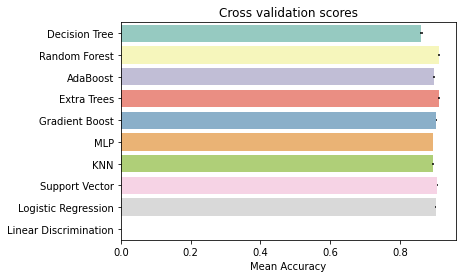

In [193]:
g = sns.barplot("mean",results_tfidf.index ,data = results_tfidf, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

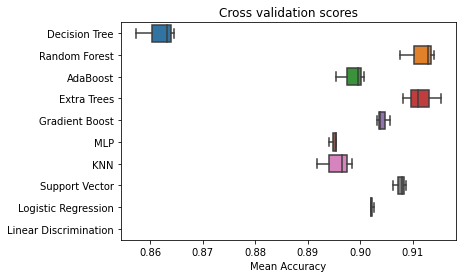

In [194]:
results2 = results_tfidf.drop(['mean', 'std'], axis=1)
g = sns.boxplot(data=results2.T, orient='h')
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [195]:
RFC = RandomForestClassifier(random_state=7)


# param_grid 설정
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100, 150, 300],
              "criterion": ["gini"]}

# Grid Search 객체 생성
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsRFC.fit(X_train_tfidf,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=7), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 150, 300]},
             scoring='accuracy', verbose=1)

In [196]:
# 최적의 파라미터 조합 출력
RFC_best = gsRFC.best_estimator_
RFC_params = gsRFC.best_params_
print(RFC_best)
print(RFC_params)

# 최고 점수(accuracy) 출력
print(gsRFC.best_score_)

RandomForestClassifier(bootstrap=False, random_state=7)
{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9120975798403012


In [197]:
# 모델 2 : 트리 앙상블 모형 TF-IDF
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 100, max_depth=20, random_state = 7)
model_rf.fit(X_train_tfidf, y_train)
print('Train set score: {:.3f}'.format(model_rf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(model_rf.score(X_test_tfidf, y_test)))


Train set score: 0.912
Test set score: 0.902


In [198]:
print(model_rf.n_estimators)

100


In [199]:
# 모델 3 : Naive Bayes 분류모형 TF-IDF
from sklearn.naive_bayes import MultinomialNB

NB_clf = MultinomialNB(alpha=1)
NB_clf.fit(X_train_tfidf, y_train)
print('Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test)))

Train set score: 0.904
Test set score: 0.901


In [200]:
# KNN 객체 생성
KNN = KNeighborsClassifier()

# param_grid 설정
knn_param_grid = {"n_neighbors" : [1, 2, 3, 4, 5], 
                  "algorithm": ['auto'],
                  "weights" : ['uniform', 'distance'],
                  "leaf_size" : [1, 2, 3, 4, 5, 10]}

# Grid Search 객체 생성
gsKNN = GridSearchCV(KNN, param_grid = knn_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsKNN.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'algorithm': ['auto'],
                         'leaf_size': [1, 2, 3, 4, 5, 10],
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [201]:
# 최적의 파라미터 조합 출력
KNN_best = gsKNN.best_estimator_
KNN_params = gsKNN.best_params_
print(KNN_best)
print(KNN_params)

# 최고 점수(accuracy) 출력
print(gsKNN.best_score_)


KNeighborsClassifier(leaf_size=1, weights='distance')
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}
0.9048386613032183


In [202]:
# AdaBoost 객체 생성
ADA = AdaBoostClassifier(random_state=7)

# param_grid 설정
ada_param_grid = {"n_estimators" :[1,20,30],
                  "algorithm" : ["SAMME","SAMME.R"],                  
              "learning_rate":  [0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

# Grid Search 객체 생성
gsADA = GridSearchCV(ADA, param_grid = ada_param_grid, cv=kfold, scoring="accuracy", verbose = 1)

# Grid Search 실행
gsADA.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(random_state=7),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 1.5],
                         'n_estimators': [1, 20, 30]},
             scoring='accuracy', verbose=1)

In [203]:
# 최적의 파라미터 조합 출력
ADA_best = gsADA.best_estimator_
ADA_params = gsADA.best_params_
print(ADA_best)
print(ADA_params)

# 최고 점수(accuracy) 출력
print(gsADA.best_score_)


AdaBoostClassifier(learning_rate=0.3, n_estimators=20, random_state=7)
{'algorithm': 'SAMME.R', 'learning_rate': 0.3, 'n_estimators': 20}
0.9014114042280924


In [204]:
# Gradient boost 객체 생성
GBC = GradientBoostingClassifier(random_state=7)

# param_grid 설정
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              }
# Grid Search 객체 생성
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsGBC.fit(X_train_tfidf,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=7), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'loss': ['deviance'], 'max_depth': [4, 8],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [205]:
# 최적의 파라미터 조합 출력
GBC_best = gsGBC.best_estimator_
GBC_params = gsGBC.best_params_
print(GBC_best)
print(GBC_params)

# 최고 점수(accuracy) 출력
print(gsGBC.best_score_)


GradientBoostingClassifier(learning_rate=0.05, max_depth=8,
                           min_samples_leaf=100, n_estimators=300,
                           random_state=7)
{'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 8, 'min_samples_leaf': 100, 'n_estimators': 300}
0.9112901121725355


In [206]:
#ExtraTrees 객체 생성
Ext = ExtraTreesClassifier(random_state=7)


# param_grid 설정
ex_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

# Grad Search 객체 생성
gsExt = GridSearchCV(Ext,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsExt.fit(X_train_tfidf,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=ExtraTreesClassifier(random_state=7), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

In [207]:
# 최적의 파라미터 조합 출력
Ext_best = gsExt.best_estimator_
Ext_params = gsExt.best_params_
print(Ext_best)
print(Ext_params)

# 최고 점수(accuracy) 출력
print(gsExt.best_score_)


ExtraTreesClassifier(min_samples_split=3, n_estimators=300, random_state=7)
{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
0.9120973360028656


In [208]:
# Decision Tree 객체 생성
DTC = DecisionTreeClassifier(random_state=7, )

# param_grid 설정
dtc_param_grid = {"criterion" : ["gini", "entropy"],
              "min_samples_split" :   [2, 4, 6, 10],
              "min_samples_leaf" : [1,3, 5, 10]}

# Grad Search 객체 생성
gsDTC = GridSearchCV(DTC,param_grid = dtc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsDTC.fit(X_train_tfidf,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=7), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'min_samples_split': [2, 4, 6, 10]},
             scoring='accuracy', verbose=1)

In [209]:
# 최적의 파라미터 조합 출력
DTC_best = gsDTC.best_estimator_
DTC_params = gsDTC.best_params_
print(DTC_best)
print(DTC_params)

# 최고 점수(accuracy) 출력
print(gsDTC.best_score_)


DecisionTreeClassifier(min_samples_leaf=10, random_state=7)
{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 2}
0.8860876844294924


In [210]:
#Support Vector 객체 생성
SVM = SVC(random_state=7, probability=True)

# param_grid 설정
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

# Gradient boost 객체 생성
gsSVM = GridSearchCV(SVM,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsSVM.fit(X_train_tfidf,y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(probability=True, random_state=7), n_jobs=4,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [211]:
# 최적의 파라미터 조합 출력
SVM_best = gsSVM.best_estimator_
SVM_params = gsSVM.best_params_
print(SVM_best)
print(SVM_params)

# 최고 점수(accuracy) 출력
print(gsSVM.best_score_)


SVC(C=50, gamma=1, probability=True, random_state=7)
{'C': 50, 'gamma': 1, 'kernel': 'rbf'}
0.9131053599613566


In [213]:
#MLP객체 생성
MLP = MLPClassifier()

# param_grid 설정
mlp_param_grid = {'hidden_layer_sizes': [100, 150, 200, 250], 
                #   'activation': ['identity', 'logistic', 'tanh', 'relu'],
                #   'solver': ['lbfgs','sgd','adam'],
                  'alpha': [ 0.0001, 0.001, 0.01],
                #   'learning_rate': ['const  ant','invscaling','adaptive']
                }

# Gradient boost 객체 생성
gsMLP = GridSearchCV(MLP,param_grid = mlp_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsMLP.fit(X_train_tfidf,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=MLPClassifier(), n_jobs=4,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [100, 150, 200, 250]},
             scoring='accuracy', verbose=1)

In [214]:
# 최적의 파라미터 조합 출력
MLP_best = gsMLP.best_estimator_
MLP_params = gsMLP.best_estimator_
print(MLP_best)

# 최고 점수(accuracy) 출력
print(gsMLP.best_score_)


MLPClassifier(alpha=0.01, hidden_layer_sizes=100)
0.9014117699842457


In [215]:
# Linear Discrimination Analysis 객체 생성
#LDA = LinearDiscriminantAnalysis()

# param_grid 설정
#lda_param_grid = {'solver': ['svd','lsqr','eigen'], 
#                  'n_components': [ 'False', 1, 3, 5],
#                  'tol': [1.0e-13, 1.0e-9, 1.0e-8, 1.0e-6, 1.0e-5]}

# Gradient boost 객체 생성
#gsLDA = GridSearchCV(LDA,param_grid = lda_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
#gsLDA.fit(X_train_tfidf,y_train)

In [216]:
# 최적의 파라미터 조합 출력
#LDA_best = gsLDA.best_estimator_
#print(LDA_best)

# 최고 점수(accuracy) 출력
#print(gsLDA.best_score_)


In [217]:
# Logistic Regression 객체 생성
LGS = LogisticRegression(random_state=7)

# param_grid 설정
lgs_param_grid = {'penalty': ['l1','l2'], 
                  'C': np.logspace(0,4,10)}

# Gradient boost 객체 생성
gsLGS = GridSearchCV(LGS,param_grid = lgs_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsLGS.fit(X_train_tfidf,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=7), n_jobs=4,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [218]:
# 최적의 파라미터 조합 출력
LGS_best = gsLGS.best_estimator_
LGS_params = gsLGS.best_params_
print(LGS_best)
print(LGS_params)

# 최고 점수(accuracy) 출력
print(gsLGS.best_score_)


LogisticRegression(C=7.742636826811269, random_state=7)
{'C': 7.742636826811269, 'penalty': 'l2'}
0.9100808004110124


## 4-3. Learning Curve 시각화

`learning_curve(estimator, X, y, cv, njobs, train_sizes)`
* 사이킷런에서 제공하는 학습곡선 기능이다.
* 모델을 평가하기 위한 교차검증된 train socre와 점수와 test score을 결정한다.
* estimator = 검증에 사용할 estimator 종류
* X, y = 데이터
* cv = 교차검증에 사용할 fold의 개수 k, (기본 값=5)
* train_sizes = learning curve에 사용할 데이터의 사이즈 지정 (기본 값=np.linspace(0.1, 1.0, 5))

참고: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

`linspace(start, stop, num)`
* numpy에서 제공하는 기능으로 1차원 배열을 생성한다
* start = 시작 숫자
* stop = 끝 숫자
* number = start와 stop 숫자 사이에 일정한 간격으로 몇 개의 숫자를 만들 것인지 지정

예) np.linspace(0,1,6) = [0, .2, .4, .6, .8, 1]


In [219]:
# 예시로 Random Forest classifier가 교차검증에서 가장 좋은 성능을 보였던 파라미터 조합으로 learning curve를 출력해보자.
lc = learning_curve(gsRFC.best_estimator_, X_train_tfidf, y_train, cv=3)
lc

(array([ 330, 1074, 1818, 2562, 3306]),
 array([[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99834983, 0.99944994, 0.99944994],
        [0.99843872, 0.99921936, 0.99843872],
        [0.99727768, 0.99818512, 0.9984876 ]]),
 array([[0.90145103, 0.90018149, 0.90139141],
        [0.90266022, 0.90018149, 0.90320629],
        [0.90568319, 0.90381125, 0.90441621],
        [0.90689238, 0.90865094, 0.9092559 ],
        [0.90810157, 0.91167574, 0.91530551]]))

In [220]:
# 첫 번째 행으로 learning curve를 생성하기 위해 사용된 학습 데이터 셋의 크기를 반환한다.
lc[0]

array([ 330, 1074, 1818, 2562, 3306])

In [221]:
# 두 번째 행으로 학습 데이터에 대한 점수를 반환한다.
lc[1]

array([[1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        ],
       [0.99834983, 0.99944994, 0.99944994],
       [0.99843872, 0.99921936, 0.99843872],
       [0.99727768, 0.99818512, 0.9984876 ]])

In [222]:
# 세 번째 행으로 검증 데이터에 대한 점수를 반환한다.
lc[2]

array([[0.90145103, 0.90018149, 0.90139141],
       [0.90266022, 0.90018149, 0.90320629],
       [0.90568319, 0.90381125, 0.90441621],
       [0.90689238, 0.90865094, 0.9092559 ],
       [0.90810157, 0.91167574, 0.91530551]])

In [223]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    # 그래프 설정
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # 학습 데이터에 대한 점수의 평균
    train_scores_mean = np.mean(train_scores, axis=1)
    # 학습 데이터에 대한 점수의 표준편차
    train_scores_std = np.std(train_scores, axis=1)
    # 검증 데이터에 대한 점수의 평균
    test_scores_mean = np.mean(test_scores, axis=1)
    # 검증 데이터에 대한 점수의 표준편차
    test_scores_std = np.std(test_scores, axis=1)
    
    # 그래프에 눈금 표시
    plt.grid()

    # fill_between() = 그래프의 두 수평 방향의 곡선 사이를 색상으로 채워서 강조
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # 데이터를 연결하는 선을 plot
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    # 범례 표시
    plt.legend(loc="best")
    return plt

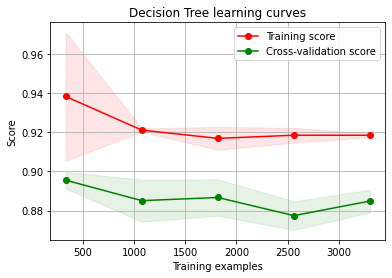

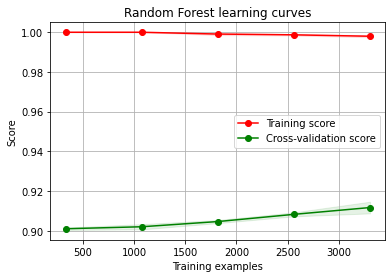

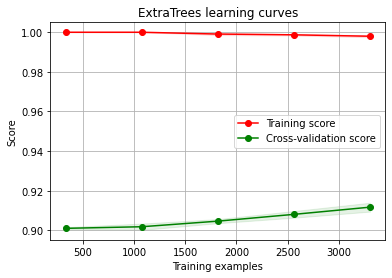

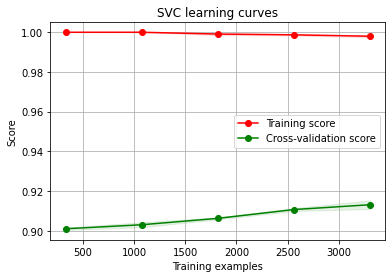

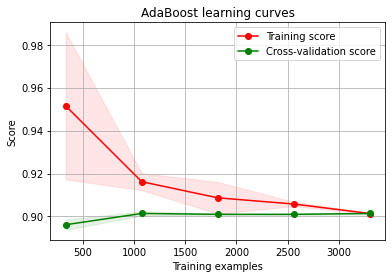

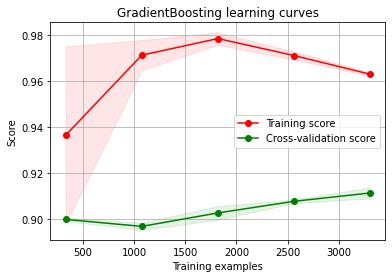

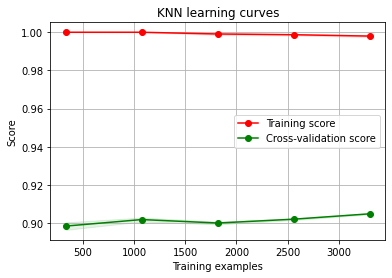

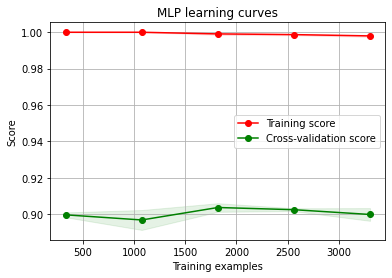

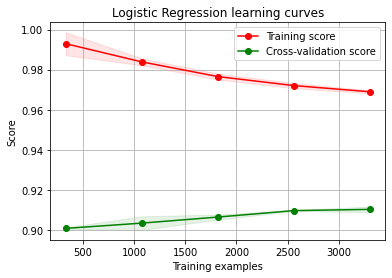

In [224]:
g = plot_learning_curve(DTC_best,"Decision Tree learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(RFC_best,"Random Forest learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(Ext_best,"ExtraTrees learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(SVM_best,"SVC learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(ADA_best,"AdaBoost learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(GBC_best,"GradientBoosting learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(KNN_best,"KNN learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(MLP_best,"MLP learning curves",X_train_tfidf,y_train,cv=kfold)
#g = plot_learning_curve(LDA_best,"Linear Discrimination Analysis learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(LGS_best,"Logistic Regression learning curves",X_train_tfidf,y_train,cv=kfold)

## 4-4. Feature Importances **시각화**

`argsort()`
* array를 정렬하는 인덱스 array를 반환한다.

예) 

a = np.array([7,2,3,1])

indicies = a.argsort()

indicies -> [3,1,2,0]

a[indicies] -> [1,2,3,7]


* .feature_importances_ 속성을 지원하지 않는 모델은 제외하였다.
* 대체로 성별(Sex) 그 다음 객실등급(Pclass)가 생존여부를 예측하는 데에 중요하였다는 것을 알 수 있다.

## 4-5. 보팅

`보팅`: 앙상블 학습의 한 유형으로, 여러 개의 estimator의 예측값을 결합하여 최종 예측을 도출하는 기법이다.

`하드보팅`: 예측한 결과값 중 가장 다수의 분류기가 예측한 결과값을 최종 결과값으로 선정한다.

`소프트보팅`: 분류기들의 레이블 값 별 평균 결정 확률 계산하여 가장 평균 확률이 높은 레이블 값을 최종 결과값으로 선정한다.

In [225]:
#튜닝한 파라미터로 하드보팅한 후 점수를 출력해보자.
grid_hard = VotingClassifier(estimators = [('Decision Tree', DTC_best), 
                                           ('Random Forest', RFC_best),
                                           ('ExtraTrees', Ext_best),
                                           ('SVC', SVM_best),
                                           ('AdaBoost', ADA_best),
                                           ('GradientBoosting', GBC_best),
                                           ('KNN', KNN_best),
                                           #('Linear Discrimination', LDA_best),
                                           ('MLP', MLP_best),
                                           ('Logistic Regression', LGS_best)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train_tfidf, y_train, cv=10)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Hard voting on test set score mean: 91.61


In [226]:
#튜닝한 파라미터로 소프트보팅한 후 점수를 출력해보자.
grid_soft = VotingClassifier(estimators = [('Decision Tree', DTC_best), 
                                           ('Random Forest', RFC_best),
                                           ('ExtraTrees', Ext_best),
                                           ('SVC', SVM_best),
                                           ('AdaBoost', ADA_best),
                                           ('GradientBoosting', GBC_best),
                                           ('KNN', KNN_best),
                                           #('Linear Discrimination', LDA_best),
                                           ('MLP', MLP_best),
                                           ('Logistic Regression', LGS_best)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train_tfidf, y_train, cv=10)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean() * 100))

Soft voting on test set score mean: 91.57
